***

Profesor: Gonzalo A. Ruz, PhD

Curso: Aprendizaje Automático

***

In [1]:
# Global imports and settings
import keras
import tensorflow
print("Using Keras",keras.__version__)
print("Using Tensorflow",tensorflow.__version__)
%matplotlib inline

ModuleNotFoundError: No module named 'keras'

In [2]:
# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)
warnings.simplefilter(action="ignore", category=DeprecationWarning)

# Clase: Redes Neuronales

## Fundamentos matemáticos
* Un primer ejemplo
* Tensores y operaciones con tensores
* Backpropagation y descenso de gradiente

### Un primer ejemplo: clasificar dígitos
- Este ejemplo está destinado a presentar los conceptos principales. Los cubriremos con más detalle más adelante
- El conjunto de datos [MNIST](https://en.wikipedia.org/wiki/MNIST_database) contiene imágenes de 28x28 píxeles de dígitos escritos a mano (0-9)
- El objetivo es clasificar cada imagen como uno de los posibles dígitos
- Son 70000 imagenes
- Keras ya trae una partición de entrenmiento (60000) y prueba (10000). 

In [7]:
#pip install tensorflow

In [6]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

2022-10-04 16:11:49.079761: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


11490434/11490434 [==============================] - 2s 0us/step


In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


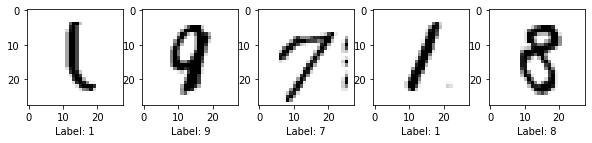

In [7]:
# Take some random examples
import matplotlib.pyplot as plt
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,60000)
    axes[i].imshow(X_train[n], cmap=plt.cm.gray_r)
    axes[i].set_xlabel("Label: {}".format(y_train[n]))
plt.show();

#### Redes neuronales
* La pieza central de una red neuronal es la _capa_
* Puede pensar en ella como un _filtro_ para los datos
    - Los datos entran y salen en una forma más útil
* Las capas extraen nuevas _representaciones_ de los datos
* Los modelos de _Deep learning_ contienen muchas de estas capas
    - *Destilan* (refinan) progresivamente los datos

![](https://drive.google.com/uc?id=1yBbnQmh3M5r2VJdD4C0mBT1CvvTLpojZ)

* Los valores de los píxeles se envían a _nodos_ individuales de la _capa de entrada_ (amarillo)
* Luego, los datos pasan a través de una o más _capas ocultas_ (azul)
    - Un tipo de capa es la capa _densa_ (dense) o _completamente conectada_ (fully connected)
    - Cada nodo está conectado a todos los nodos de las capas anteriores y posteriores.
* La _capa de salida_ tiene un nodo para cada resultado posible (dígitos 0-9) (naranjo)
    - I.e. El primer nodo devuelve la probabilidad de que la imagen de entrada represente un '0'

![](https://drive.google.com/uc?id=1CKXgAVeeDw1YITEmIjbRhOxtRwmI5xyL)

#### El perceptrón
* En su forma más simple, cada nodo genera (*outputs*) una suma ponderada de las entradas (*inputs*): $y = \sum_{i} x_{i}w_i + b$
* Necesita aprender el conjunto óptimo de pesos para producir el resultado correcto
    * _Bias_ $b$:modelado como el peso de una entrada adicional que siempre está prendida, i.e., '1'
* Esto es lo mismo que un modelo lineal, solo puede aprender fronteras de decisión lineales.
    * Incluso una red neuronal profunda de perceptrones solo puede aprender un modelo lineal

![](https://drive.google.com/uc?id=1mbFczEOoP3E7uwea09LJVmsG2H9Mxsl7)


#### Funciones de activación
* Para aprender un modelo no lineal, cada nodo oculto tiene que generar una *función de activación* $f$ no lineal en la suma ponderada de las entradas: $h(x)=f(W_1 x+b_1)$
* Asimismo, los nodos de salida usan una función de activación $g$ en las salidas ponderadas de la capa anterior: $o(x)=g(W_2 h(x)+b_2)$

![](https://drive.google.com/uc?id=1BL0s6Zc075j3yPndY0WBV3TG03-fPq6C)

#### Funciones de activación
* Para los nodos ocultos, las opciones populares son _rectified linear unit_ (ReLU) y _tanh_
    - Hay muchas otras. ¡Volveremos a esto pronto!
    - ReLU Es muy barato de calcular, acelera el entrenamiento
* Para la clasificación, utilizamos *softmax* (o *sigmoid*)
    - Transforma la entrada en una probabilidad para cada resultado específico
    - Esto es exactamente lo que usamos para la regresión logística!

![](https://drive.google.com/uc?id=1KO1NWlpRTDAdRSB4fd-0KhRltXHuEveA)

Ahora podemos construir una red neuronal simple para MNIST:
* Una capa de ReLU oculta densa con 512 nodos
    - Entrada de una matriz de 28x28
* Capa de salida softmax con 10 nodos

``` python
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

```

In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential() #hay qye importar la función models y luego layers, 
#en este caso la red se llama network
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,))) #primera capa oculta, en este caso
#layers.dense

#como tenemos 784 entradas y 512 neuronas, es igual a 784*512 = 401408 + 512 = (401920)
network.add(layers.Dense(10, activation='softmax'))
#la salida de la capa oculta 512 tiene que conectarse a las 10 (salidas), pero tengo que agregar una neurona
# de salida : 5120 (512*10) + 10

'Visualice' el modelo usando `summary()` 
- También muestra el número de parámetros del modelo (pesos) que deben aprenderse

In [16]:
network.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


#### Compilación
Todavía necesitamos especificar cómo queremos que se entrene la red:
* __Loss function__: La función objetivo utilizada para medir qué tan bien está funcionando el modelo y dirigirse en la dirección correcta
    - e.g. Cross Entropy (_negative log likelihood_ o _log loss_) para clasificación
* __Optimizer__: Cómo optimizar los pesos del modelo en cada iteración.
    - usualmente una [variación de stochastic gradient descent](https://arxiv.org/pdf/1609.04747.pdf)
* __Metrics__ para monitorear el rendimiento durante el entrenamiento y las prueba.
    - ej. accuracy
    
``` python
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy', #en este caso utilizamos categorical_crossentropy para multiclass
                metrics=['accuracy'])
```

In [17]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#### Pre procesamiento
* Las redes neuronales son sensibles al escalado, así que siempre escale las entradas
* La red espera los datos en forma (n, 28 * 28), por lo que también necesitamos remodelar (reshape)
* También necesitamos codificar categóricamente las etiquetas
    - ej. '4' pasa ha ser [0,0,0,0,1,0,0,0,0,0]

``` python
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
```

In [18]:
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#### Entrenamiento
El entrenamiento (fitting) se hace por __stochastic gradient descent__ (SGD).
* Optimiza los parámetros del modelo (pesos)
* Volveremos a esto pronto

In [19]:
network.fit(X_train, y_train, epochs=5, batch_size=128);

Epoch 1/5
469/469 [==============================] - 7s 12ms/step - loss: 0.2599 - accuracy: 0.9247
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1039 - accuracy: 0.9694
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0681 - accuracy: 0.9800
Epoch 4/5
469/469 [==============================] - 6s 14ms/step - loss: 0.0497 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0381 - accuracy: 0.9888


#### Predicción
Ahora podemos usar `predict` o `predict_proba` para generar predicciones

``` python
np.set_printoptions(precision=7)
print("Prediction: ",network.predict(X_test)[0])
```

In [20]:
import numpy as np

np.set_printoptions(precision=7)
print("Prediction: ",network.predict(X_test)[0])
print("Label: ",y_test[0])

313/313 [==============================] - 1s 3ms/step
Prediction:  [7.8494518e-09 4.1674247e-11 1.0700379e-06 6.5928725e-05 6.5610174e-12
 5.0103026e-08 5.2993087e-15 9.9993193e-01 3.6577518e-08 1.0517269e-06]
Label:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


#### Evaluación
Evaluar el modelo entrenado en todo el conjunto de prueba

``` python
test_loss, test_acc = network.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
```

In [18]:
test_loss, test_acc = network.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0803 - accuracy: 0.9802
Test accuracy: 0.9801999926567078


#### Sobreajuste
* El accuracy en el conjunto de prueba es un poco más bajo que el accurcay en el conjunto de entrenamiento
* Ya hemos visto muchas opciones (piezas móviles) que aún se pueden optimizar:
    - Número de capas
    - Número de nodos por capa
    - Funciones de activación
    - Loss function (y los hiperparámetros)
    - SGD optimizer (y los hiperparámetros)
    - Tamaño del Batch
    - Número de épocas

### Tensores y operaciones con tensores
Representando datos y aprendiendo mejores representaciones

#### Tensores
* Un _tensor_ es simplemente una matriz (un arreglo) de n dimensiones (con n ejes)
    * 2D tensor: matriz (samples, features)
    * 3D tensor: imágenes en niveles de gris (samples, height, width)
        - o series de tiempo (samples, timesteps, features)
    * 4D tensor: imágenes a color (samples, height, width, channels)
    * 5D tensor: video (samples, frames, height, width, channels)  
    
![](https://drive.google.com/uc?id=1Ik0qtOXMeDmzaslspuuluW-m6_6PFeQS)

![](https://drive.google.com/uc?id=1oXLwWvnlgmx3vv3hpZ3Si6IUz6ejEujX)

#### Operaciones con tensores
Las operaciones que las capas de la red neuronal realizan en los datos se pueden reducir a unas pocas operaciones tensoriales.

``` python
keras.layers.Dense(512, activation='relu') 
```

se puede interpretar como una función

``` python
y = relu(dot(W, x) + b)
```

* toma un tensor 2D $x$ y devuelve un nuevo tensor 2D $y$
* usa un tensor de peso 2D $W$ y un vector de sesgo $b$
* realiza un producto punto, suma y $relu(x) = max(x,0)$

#### Operaciones basadas en elementos (Element-wise operations)

ReLU y la suma son operaciones basadas en elementos. Dado que los arreglos numpy admiten operaciones basadas en elementos de forma nativa, estas son simplemente:

``` python
def relu(x):
  return np.maximum(x, 0.)

def add(x, y):
  return x + y
```

Nota: si y tiene una dimensión menor que x, será *broadcasted*: ejes se agregan para que coincidan con la dimensionalidad, e y se repite a lo largo de los nuevos ejes 

``` python
>>> np.array([[1,2],[3,4]]) + np.array([10,20])
array([[11, 22],
       [13, 24]])
```

#### Tensor dot
El producto punto $x . y$ de dos tensores también se puede hacer fácilmente con numpy:
``` python 
z = np.dot(x, y)
```
donde 
``` python 
z[i,j] = x[i,:] * y[:,j]
```

![](https://drive.google.com/uc?id=1ZRAh_vC6lAulFE3KxenRNh36mh_o0r0V)

#### Interpretación geométrica
* Los productos de punto y las adiciones cambian la forma en que los puntos de datos se relacionan entre sí
* Nuestro objetivo es encontrar una transformación de los puntos de datos para que sea fácil:
    - separar las clases (clasificación)
    - aprender una función simple (regresión)

![](https://drive.google.com/uc?id=1AweAOix_IbFbHKnjmj3RYIgHkdGTfrX0)

![](https://drive.google.com/uc?id=1v5-eamP3AQ_vxHs4hWelr6lZ_b0vvoDg)

### Optimización basada en gradientes
* Vimos que una capa realiza una operación como:
``` python
y = relu(dot(W, x) + b)
```

* ¿Cómo encontrar buenos valores para $W$ y $b$ para que los datos se transformen en una representación útil?
* Comience con una inicialización aleatoria, luego repita:
    1. Saque un un lote (*batch*) de datos de entrenamiento $x$
    2. _Forward pass_: ejecutar la red en $x$ para producir $y_{pred}$ (operaciones de tensor)
    3. Computar el loss (discrepancia entre $y_{pred}$ e $y$)
    4. Actualizar $W$, $b$ de una manera que reduce ligeramente el loss (OK, pero cómo?)

#### Regla de actualización
Enfoque ingenuo (caro):
* Elija un peso $w_{i, j}$ para optimizar, congele los demás
* Ejecute la red (dos veces) con $w_{i,j} - \epsilon$ y $w_{i,j} + \epsilon$
* Calcule las pérdidas dado el actual batch x
* Conserve el que reduzca más la pérdida, luego repita

![](https://drive.google.com/uc?id=1BfdkGQBAwmdGAwo9XlsXmzHGxhVP16XA)

Mejor:
* Elegir una loss function f que sea _diferenciable_
    * Además, todas las operaciones de tensores subyacentes deben ser diferenciables
* Luego, podemos calcular la derivada $\frac{\partial f(x,w_{i,j})}{\partial w_{i,j}} = a$
* Tal que $f(x,w_{i,j} + \epsilon) = y + a * \epsilon$
* Ahora podemos estimar mejores pesos sin volver a calcular $f$

#### Gradientes
* Un _gradiente_ es la generalización de una derivada a entradas de n-dimensiones
    * Aproxima la _curvatura_ de la función de pérdida (loss function) $f(x,W)$ alrededor de un punto dado $W$
* Actualización: Si $f$ es diferenciable, entonces $W_1$ = $W_0$ - $\frac{\partial f(W_0)}{\partial W} * step$ 
    * step es un pequeño factor de escalamiento
    * Ir en contra de la curvatura a un lugar más bajo en la curva.
* Ahora repita con un nuevo lote de datos $x$

![](https://drive.google.com/uc?id=1hjXtfZJLZ28ZXEWzM8WvoWsakkEnaqb-)

#### Stochastic gradient descent (SGD)
Mini-batch SGD:
1. Obtener un lote de *batch_size* datos de entrenamiento $x$ e $y$
2. _Forward pass_: correr la red usando $x$ para obtener $y_{pred}$ (operaciones de tensor)
3. Computar la pérdida L (desacuerdo entre  $y_{pred}$ e $y$)
4. _Backward pass_: Computar el gradiente de la pérdida con respecto a $W$
5. Actualizar W: $W_{i+1} = W_i - \frac{\partial L(x, W_i)}{\partial W} * step$

Repita hasta que se hagan n pasadas (épocas) a través de todo el conjunto de entrenamiento.

variantes de SGD:
* Batch Gradient Descent: calcular gradiente en todo el conjunto de entrenamiento
    - Gradientes más precisos, pero más caros
* True Stochastic Gradient Descent: repetir para cada punto de datos individual (ruidoso)
* Minibatch SGD logra un equilibrio entre los dos (dado el tamaño de lote correcto)
    
![](https://drive.google.com/uc?id=1malzKvK1OPTPkAxIAkP_jgQEucKM75S-)

![](https://drive.google.com/uc?id=1KnuK6KuXjLhjXWpCVb2O1PZxXhD-tXbN)

#### SGD: muchas más variantes
* Con SGD, es bastante fácil quedar atrapado en un mínimo local
* Decaimiento de la tasa de aprendizaje: comenzar con un tamaño de paso grande y luego disminuya
* Momentum: hacer una actualización más grande si la actualización anterior tiene una gran mejora en la función de pérdida
    - Como una pelota que gana velocidad si baja abruptamente
* Tamaño de paso (step) adaptable para cada W_i: adam, Adagrad,...
    - Ver https://arxiv.org/pdf/1609.04747.pdf
* Algunas intuiciones dicen que en espacios de alta dimensión, la mayoría de los mínimos locales están cerca del mínimo global

![](https://drive.google.com/uc?id=1cqEtD48cW4XpOf8Suci6_vufyxlQe3dS)

#### Backpropagation
* En la práctica, una función de red neuronal consta de muchas operaciones de tensores encadenados
    - ej. $f(W1, W2, W3) = a(W1, b(W2, c(W3)))$
* Siempre que cada operación tensorial sea diferenciable, aún podemos calcular el gradiente gracias a la regla de la cadena:
    $$f(g(x)) = f'(g(x)) * g'(x)$$
* Podemos dejar que el gradiente se propague hacia atrás (*backpropagat*) a través de las capas
* Entonces, si tenemos un nodo oculto $h(x)=f(W_1 x+b_1)$, $net(x) = W_1 x+b_1$, y un nodo de salida $o(x)=g(W_2 h(x)+b_2)$

![](https://drive.google.com/uc?id=1xm-W2BLvEgQZClTu5w5534-PkKA6_bBe)

### Entendiendo $\frac{\partial h(x)}{\partial net(x)}$
- Imagina un diablito que agrega un pequeño cambio $\Delta u_k$ a la entrada de una neurona $k$
    - La neurona ahora emite $\sigma(u_k + \Delta u_k)$ en vez de $\sigma(u_k)$
    - Se propaga a través de la red, provocando finalmente un error $\frac{\delta E}{\delta u_k} \Delta u_k$
- Un buen diablito te ayuda a mejorar el error al tratar de encontrar un $\Delta u_k$ que reduce el error
    - Si $\frac{\delta E}{\delta u_k}$ es grande, elige $\Delta u_k$ para reducirlo.

![Tampering with the weights creates an error downstream.](https://drive.google.com/uc?id=1Wor3mwz4qcvbzhf3nKU-LUKIi_qQsfkQ)

### Backpropagation en acción
Para obtener una comprensión intuitiva de cómo backpropagation funciona, aquí hay una bonita animación de todo el proceso:

In [ ]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/Ilg3gGewQ5U" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

#### Diferenciación simbólica y automática
Diferenciación simbólica: dada una cadena de operaciones con una derivada conocida, podemos calcular una *función de gradiente* para la cadena
* Descompone funciones en funciones más simples mediante la regla de la cadena
* Podemos llamar a la función de gradiente para obtener el valor de gradiente para cada parámetro del modelo.

Diferenciación automática: evalúe la derivada de una función numéricamente para un cálculo más rápido


Las herramientas modernas como TensorFlow hacen esto por uno para que no tengamos que implementar backpropagation

### Jugar con redes neuronales


http://playground.tensorflow.org



### Videos:

In [ ]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/Suevq-kZdIw" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [ ]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/yRUUDJfDarU" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')
